In [1]:
cd ../../../src

/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/src


In [2]:
import os
import yaml
import pickle

import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from data_handlers.data_loader import DataLoader

%matplotlib inline

# Functions


In [3]:
def aggregate(sequence:list, keys:list, states:list, actions:list):
    """
    Takes the sequence of actions with len(states) states and len(actions) actions, and creates a vector
    with the aggregated time and n_states x n_actions features.
    
    Args:
        sequence [list]: the vector containing the students action, where each list in the sequence has a 1 in 
        the first n_states entry, and a number > 0 in the last n_actions entry, and where the rest is zero
        keys [list]: vector of the known aggregated features (each entry in the form {indexstate}_{indexaction})
        states [list]: states in the features
        actions [list]: actions in the features
    """
    n_states = len(states)
    n_actions = len(actions)
    new_sequences = {k:0 for k in keys}
    for vector in sequence:
        index_state = np.argmax(vector[0:n_states])
        index_action = np.argmax(vector[-n_actions:])
        action_time = vector[n_states + index_action]
        state = states[index_state]
        action = actions[index_action]
        
        new_sequences['{}_{}'.format(state, action)] += action_time
    return new_sequences

In [4]:
def get_colour(n:int) -> str:
    """Returns n colours from the chosen palette

    Args:
        n (int): number of colours wanted

    Returns:
        list: n randomly chosen colours. If n > len(palette) -> some colours will be selected more than
        once
    """
    colours = [
        '#241A7A', '#7A89F7', '#AFB9FA', '#EFF3F6', '#EF8C34',
        '#594DD4', '#213AF2', '#A8BCC7', '#A8BCC7', '#A8BCC7', 
        '#618595', '#618595'
    ]
    replace_bool = n > len(colours)
    return np.random.choice(colours, size=n, replace=replace_bool)

In [5]:
def prepare_data(sequences:list, keys:list):
    """
    Takes the sequences where each data point is represented by a dictionary, where the key is the name
    of the feature, and the value is the time spent on that feature. Then, it transforms it into a list with just 
    the time spent on that feature
    
    Args:
        sequences [list]: list of data points, where each data point is a dictionary.
        keys [list]: ordered list of the features to create the new sequences
        
    Returns:
        new_sequences [list] new list of features
    """
    new_sequences = []
    for seq in sequences:
        new_sequences.append([seq[k] for k in keys])
    return new_sequences

# Data

In [6]:
# Preparation of the stucture
states = [
    'greengreen',
    'greenred',
    'notgreennotred',
    'noobserved'
]
actions = [
    'other',
    'concentration', 
    'width', 
    'concentrationlab',
    'pdf',
    'break'
]

keys = []
for s in states:
    for a in actions:
        keys.append('{}_{}'.format(s, a))
        

In [7]:
# Prepation of the data
with open('./configs/oversample_config.yaml', 'r') as f:
    settings = yaml.load(f, Loader=yaml.FullLoader)
    
dl = DataLoader(settings)
sequences, labels, demographics = dl.load_data()
new_sequences = []
for seq in sequences:
    new_seq = aggregate(seq, keys, states, actions)
    new_sequences.append(new_seq)
formatted_data = prepare_data(new_sequences, keys)

# DBSCAN

**************************************************
maximum distance to be a neighbour: 0.5
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: -0.19497053096237874
    Silhouette score not including noisy samples: 0.8835850798769151


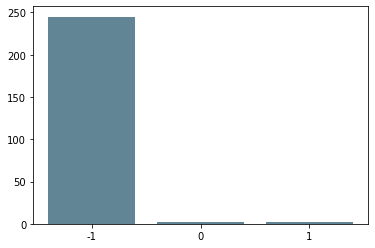

**************************************************
maximum distance to be a neighbour: 1.0
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: -0.22321488970541942
    Silhouette score not including noisy samples: 0.4688553858539032


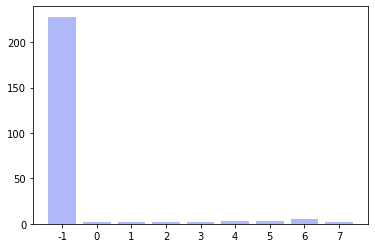

**************************************************
maximum distance to be a neighbour: 1.5
minimum number of samples in a cluster: 4.0
    Silhouette score including noisy samples: -0.18921219419797972
    Silhouette score not including noisy samples: 0.4662805404104845


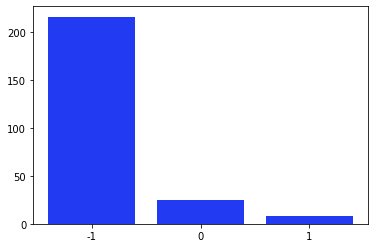

**************************************************
maximum distance to be a neighbour: 1.0
minimum number of samples in a cluster: 3.0
    Silhouette score including noisy samples: -0.20031005874115043
    Silhouette score not including noisy samples: 0.4567078555355888


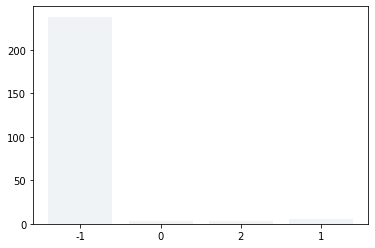

**************************************************
maximum distance to be a neighbour: 1.5
minimum number of samples in a cluster: 5.0
    Silhouette score including noisy samples: -0.20429639173410338
    Silhouette score not including noisy samples: 0.4513757742675024


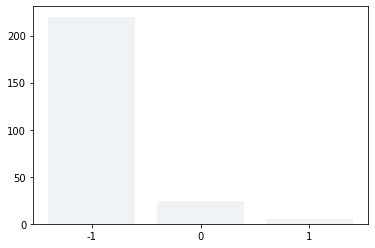

**************************************************
maximum distance to be a neighbour: 5.0
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: 0.4065141254635761
    Silhouette score not including noisy samples: 0.4300538437588147


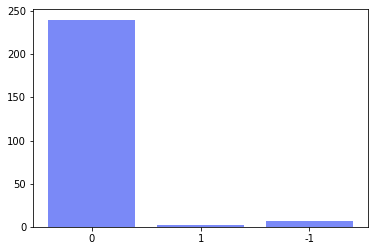

**************************************************
maximum distance to be a neighbour: 2.0
minimum number of samples in a cluster: 9.0
    Silhouette score including noisy samples: -0.10581417372508728
    Silhouette score not including noisy samples: 0.3426060021493926


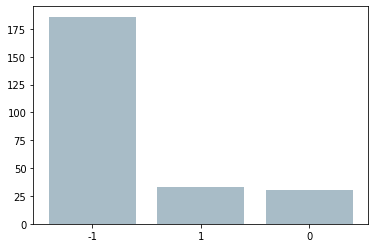

**************************************************
maximum distance to be a neighbour: 2.0
minimum number of samples in a cluster: 8.0
    Silhouette score including noisy samples: -0.10233647294580697
    Silhouette score not including noisy samples: 0.3396617016809924


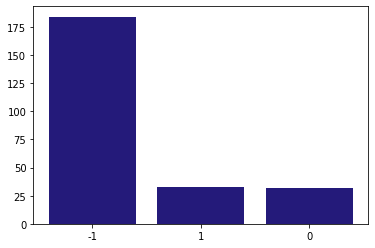

**************************************************
maximum distance to be a neighbour: 2.0
minimum number of samples in a cluster: 6.0
    Silhouette score including noisy samples: -0.07640589309774813
    Silhouette score not including noisy samples: 0.3315834012705871


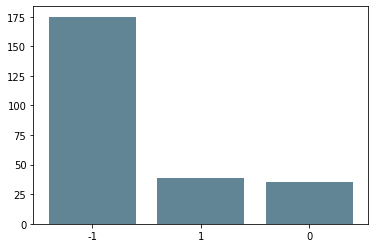

**************************************************
maximum distance to be a neighbour: 2.0
minimum number of samples in a cluster: 7.0
    Silhouette score including noisy samples: -0.08234985176395562
    Silhouette score not including noisy samples: 0.33125089292085413


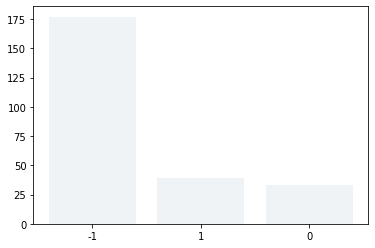

**************************************************
maximum distance to be a neighbour: 3.5
minimum number of samples in a cluster: 3.0
    Silhouette score including noisy samples: 0.1977893266074193
    Silhouette score not including noisy samples: 0.3025007544570128


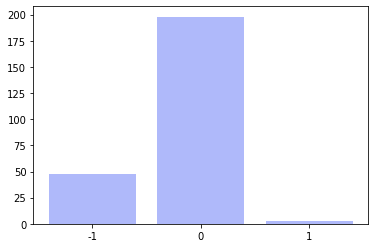

**************************************************
maximum distance to be a neighbour: 1.5
minimum number of samples in a cluster: 3.0
    Silhouette score including noisy samples: -0.22923877831093742
    Silhouette score not including noisy samples: 0.28296233405279975


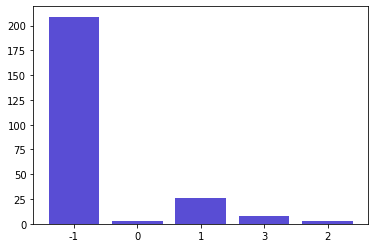

**************************************************
maximum distance to be a neighbour: 1.5
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: -0.24245780209977347
    Silhouette score not including noisy samples: 0.25389346475857133


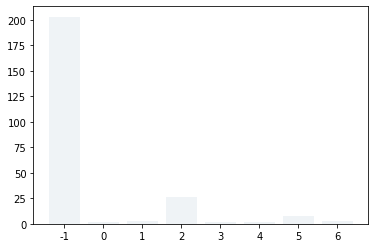

**************************************************
maximum distance to be a neighbour: 3.5
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: 0.10563317046226979
    Silhouette score not including noisy samples: 0.1921048280577063


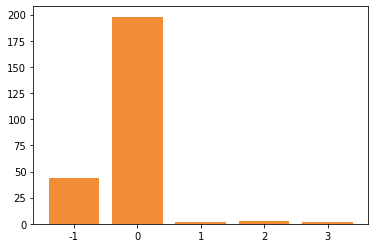

**************************************************
maximum distance to be a neighbour: 2.5
minimum number of samples in a cluster: 3.0
    Silhouette score including noisy samples: -0.003144606497345684
    Silhouette score not including noisy samples: 0.17736975035551794


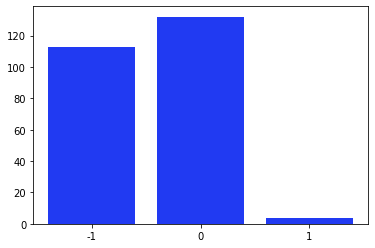

**************************************************
maximum distance to be a neighbour: 2.0
minimum number of samples in a cluster: 3.0
    Silhouette score including noisy samples: -0.131528392215148
    Silhouette score not including noisy samples: 0.14342277923163557


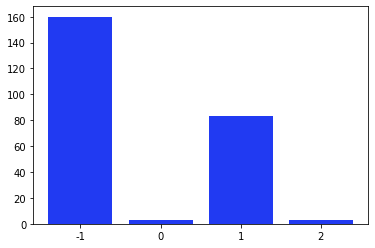

**************************************************
maximum distance to be a neighbour: 3.0
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: 0.03167785363368725
    Silhouette score not including noisy samples: 0.14155251038117045


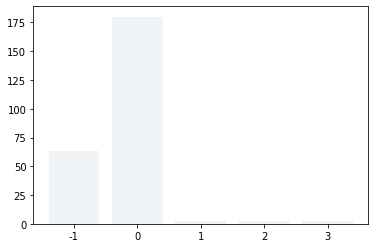

**************************************************
maximum distance to be a neighbour: 2.5
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: -0.059310291245471165
    Silhouette score not including noisy samples: 0.11656811261136293


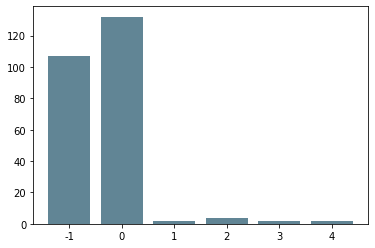

**************************************************
maximum distance to be a neighbour: 2.0
minimum number of samples in a cluster: 2.0
    Silhouette score including noisy samples: -0.22320305381734387
    Silhouette score not including noisy samples: -0.05705090005650023


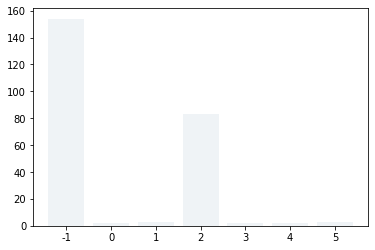

In [8]:
scores = []
for eps in np.arange(0.5, 10, 0.5):
    for min_samples in range(2, 10):
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(formatted_data)
        cluster_labels = Counter(clustering.labels_)
        
        non_noisy = [i for i in range(len(clustering.labels_)) if clustering.labels_[i] != -1]
        non_noisy_data = [formatted_data[idx] for idx in non_noisy]
        non_noisy_labels = [clustering.labels_[idx] for idx in non_noisy]
        if len(non_noisy) == 0 or len(np.unique(clustering.labels_)) < 2:
#             print('    No valid clusters')
            continue
        else:
            try:
                scores.append([
                    eps, 
                    min_samples,
                    silhouette_score(non_noisy_data, non_noisy_labels),
                    silhouette_score(formatted_data, clustering.labels_)
                    ])
            except ValueError:
                continue

        
scores_df = pd.DataFrame(scores)
scores_df.columns = ['eps', 'min_samples', 'non_noisy_silhouette', 'noisy_silhouette']
scores_df = scores_df.sort_values(['non_noisy_silhouette', 'noisy_silhouette'], ascending=False)
for i, row in scores_df.iterrows():
    print('*'*50)
    print('maximum distance to be a neighbour: {}'.format(row['eps']))
    print('minimum number of samples in a cluster: {}'.format(row['min_samples']))
    print('    Silhouette score including noisy samples: {}'.format(
        row['noisy_silhouette'])
         )
    print('    Silhouette score not including noisy samples: {}'.format(
        row['non_noisy_silhouette'])
         )
    clustering = DBSCAN(eps=row['eps'], min_samples=row['min_samples']).fit(formatted_data)
    cluster_labels = Counter(clustering.labels_)
    plt.bar(range(len(cluster_labels)), cluster_labels.values(), color=get_colour(1))
    plt.xticks(range(len(cluster_labels)), cluster_labels.keys())
    plt.show()

# Including it into the data

In [9]:
selected_combinations = [
    {'eps': 2, 'min_samples': 9}
]
selected_clusters = {}
for comb in selected_combinations:
    clustering = DBSCAN(eps=comb['eps'], min_samples=comb['min_samples']).fit(formatted_data)
    selected_clusters['{}_{}'.format(comb['eps'], comb['min_samples'])] = clustering.labels_

In [10]:
with open('../data/beerslaw/features/simplestates_clusters.pkl', 'rb') as fp:
    simple = pickle.load(fp)

In [12]:
## Test of correspondance
simple[0].keys()
test = aggregate(simple[0]['sequence'], keys, states, actions)
test = prepare_data([test], keys)

testt = aggregate(sequences[0], keys, states, actions)
testt = prepare_data([testt], keys)
for i in range(len(test[0])):
    print(test[0][i], testt[0][i])

4.352218844984802 4.352218844984802
1.1220573183214007 1.1220573183214007
0.438710783473348 0.438710783473348
0 0
0.7675037595986207 0.7675037595986207
0 0
2.183465045592714 2.183465045592714
1.9283520982599713 1.9283520982599713
2.1506943253900266 2.1506943253900266
0 0
0.45522417854433755 0.45522417854433755
0 0
1.078176291793327 1.078176291793327
0.3293244626407323 0.3293244626407323
0.4981998971369731 0.4981998971369731
0 0
0 0
1.0 1.0
2.7574468085106343 2.7574468085106343
0 0
0.29933139036516443 0.29933139036516443
0 0
1.5041056147775513 1.5041056147775513
0 0


In [13]:
for comb in selected_clusters:
    for i, idx in enumerate(simple):
        if idx == 'available_demographics':
            continue
        simple[idx]['0_cluster_state_action_{}'.format(comb)] = selected_clusters[comb][i]

In [14]:
simple[0].keys()

dict_keys(['sequence', 'idx', 'learner_id', 'gender', 'language', 'field', 'year', 'ranking', 'binconcepts', 'binvector', '0_cluster_state_1-5_7', '0_cluster_state_1-5_9', '0_cluster_state_2_9', '0_cluster_state_1_4', '0_cluster_state_action_2_9'])

In [15]:
with open('../data/beerslaw/features/simplestates_clusters.pkl', 'wb') as fp:
    pickle.dump(simple, fp)

In [27]:
test = [simple[idx]['0_cluster_state_1-5_7'] for idx in simple if idx != 'available_demographics']
test[0]

-1

In [28]:
type(test[0])

numpy.int64